In [ ]:
## 1 Dimension
intensityls = [ 0.00, 1.11,  2.22,  3.33,  4.44, 5.55,  6.66,  7.77,  8.88, 10.00]
pwrls = [3.0, 0.2498434742146487, 0.1093179309869848, 0.027676665992983643, 0.9178828370978961,
         1.8048858222406001, 1.9705953211199043, 0.8100098984786012, 1.2954634603980204,
         1.7230774906555866]

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import lagrange,CubicSpline

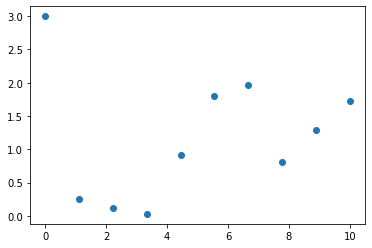

In [ ]:
plt.scatter(intensityls,pwrls)

In [ ]:
Lagrange_func = lagrange(intensityls,pwrls)

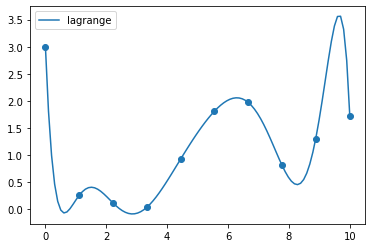

In [ ]:
#Applying Lagrange method
newxls = np.linspace(0,10,100) #intensityls is also from 0 to 10
newyls = Lagrange_func(newxls)
plt.scatter(intensityls,pwrls) #plot1
plt.plot(newxls,newyls,label='lagrange') #plot2 on the same axes. No need to put "hold on" like in Matlab
plt.legend()

In [ ]:
CubicSpline_func = CubicSpline(intensityls,pwrls)

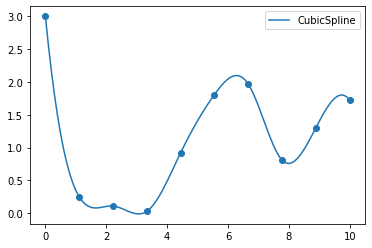

In [ ]:
#Applying CubicSpline method
new_xls = np.linspace(0,10,100) #intensityls is also from 0 to 10
new_yls = CubicSpline_func(newxls)
plt.scatter(intensityls,pwrls) #plot1
plt.plot(new_xls,new_yls,label='CubicSpline') #plot2 on the same axes. No need to put "hold on" like in Matlab
plt.legend()

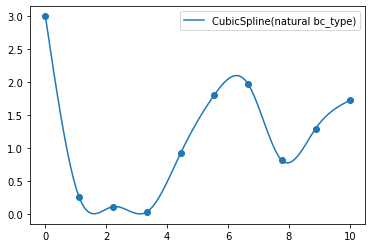

In [ ]:
CubicSpline_func2 = CubicSpline(intensityls,pwrls,bc_type='natural')
new_yls2 = CubicSpline_func2(newxls)
plt.scatter(intensityls,pwrls) #plot1
plt.plot(new_xls,new_yls2,label='CubicSpline(natural bc_type)') #plot2 on the same axes. No need to put "hold on" like in Matlab
plt.legend()

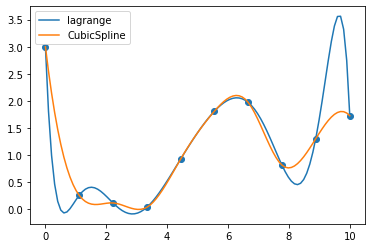

In [ ]:
plt.scatter(intensityls,pwrls)
plt.plot(newxls,newyls,label='lagrange')
plt.plot(new_xls,new_yls,label='CubicSpline')
plt.legend()

In [ ]:
## 2 Dimension
xls = [-1.0, -1.0, -1.0, -1.0, -1.0, -0.5, -0.5, -0.5, -0.5, -0.5,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0]
yls = [0.0001, 0.125075, 0.25005, 0.375025, 0.5, 0.0001, 0.125075,
       0.25005, 0.375025, 0.5, 0.0001, 0.125075, 0.25005, 0.375025, 0.5, 0.0001,
       0.125075, 0.25005, 0.375025, 0.5, 0.0001, 0.125075, 0.25005, 0.375025, 0.5]
zls = [16.012, 20.9, -15.4371, -7.6362, -5.1, 12.0182, -10.8, -3.29041,
       -1.77995, -1.1368, 0.60, 0.6031, 0.612, 0.6295, 0.6545, 3.994, 1.7389,
       1.3015, 1.131, 1.056, 0.0004796, 0.30087, 0.40566, 0.4664, 0.5142]

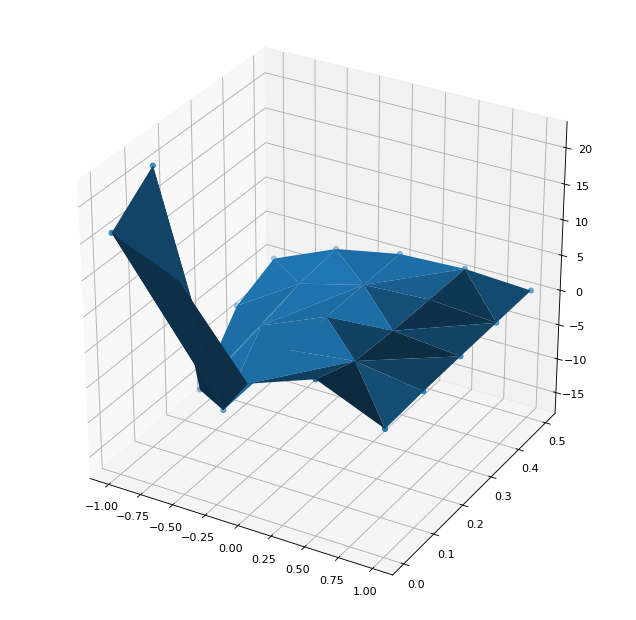

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10), dpi=80) #dpi is the density pixel
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xls,yls,zls)
ax.plot_trisurf(xls,yls,zls)
#The problem below is, if we have x,y,z data already the plot is not smooth. To make it smooth, we use approximate methods like in 1D case earlier

In [ ]:
from scipy.interpolate import interp2d

In [ ]:
Interfunc = interp2d(xls,yls,zls,kind='cubic')

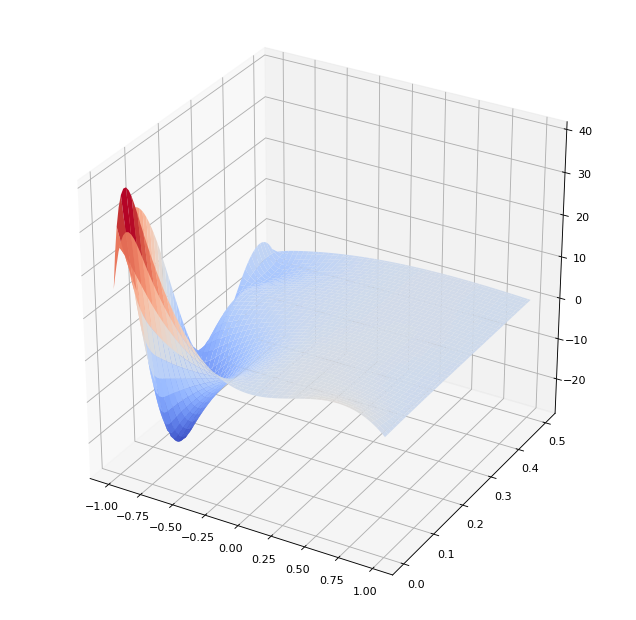

In [ ]:
#2d interpolation method (approximation)
resol = 100 #resolution
newx = np.linspace(-1.0,1.0,resol) #starting and final value are the same as the domain of xls
newy = np.linspace(0.0001,0.5,resol)
newz = Interfunc(newx,newy)

xmesh,ymesh = np.meshgrid(newx,newy)
fig = plt.figure(figsize=(10,10), dpi=80) #dpi is the density pixel
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(xmesh,ymesh,newz,cmap='coolwarm')

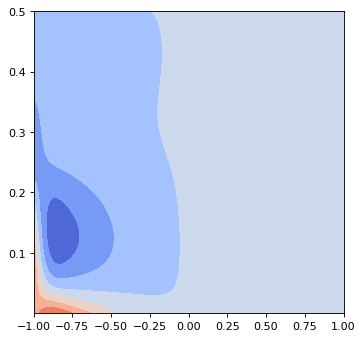

In [ ]:
#If we want the contour plot of the above,
fig = plt.figure(figsize=(5,5), dpi=80) #dpi is the density pixel
ax = fig.add_subplot(111)
ax.contourf(xmesh,ymesh,newz,cmap='coolwarm')

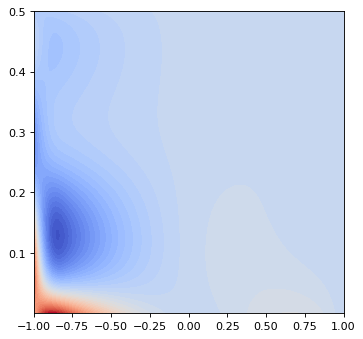

In [ ]:
fig = plt.figure(figsize=(5,5), dpi=80) #dpi is the density pixel
ax = fig.add_subplot(111)
ax.contourf(xmesh,ymesh,newz,cmap='coolwarm',levels=50)